In [37]:
import scipy.io
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import numpy as np
from PIL import Image, ImageEnhance
import cv2

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


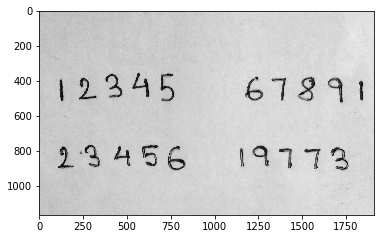

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


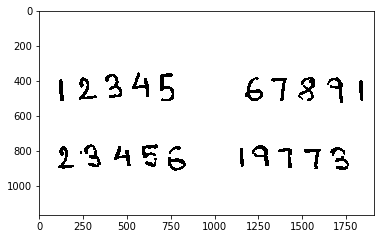

In [54]:
img=scipy.misc.imread('img.jpg')
img=img[:,:,0]
mini=2000
maxi=0
pyplot.imshow(img,cmap=cm.gray)
pyplot.show()
img=img/255.0

for i in img:
    for j in i:
        if j>maxi:
            maxi=j
        if j<mini:
            mini=j
thresh=(mini+maxi)/2.0
image_new=[]
flat=[]
for i in img:
    temp=[]
    for j in i:
        if j<thresh:
            temp.append(0.0)
        else:
            temp.append(1.0)
    image_new.append(temp)
image_new=np.matrix(image_new)
pyplot.imshow(image_new,cmap=cm.gray)
kernel = np.ones((5,5), np.uint8)

image_new = cv2.dilate(image_new, kernel, iterations=1)
image_new = cv2.erode(image_new, kernel, iterations=2)
pyplot.imshow(image_new,cmap=cm.gray)
scipy.misc.imsave('tempxyz.jpg', image_new)
